In [14]:
import xarray as xr
import numpy as np
import pandas as pd
from xhistogram.xarray import histogram as xhist
import matplotlib.pyplot as plt

In [2]:
INALT_mask=xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/1_INALT20.L46-KFS119_mesh_mask_iMirabilis.nc')
SIGMA=xr.open_dataset('/gxfs_work1/geomar/smomw523/master-thesis/data/config/ROMS/sigma2depth_parent.nc')
SIGMA_child=xr.open_dataset('/gxfs_work1/geomar/smomw523/master-thesis/data/config/ROMS/sigma2depth_child.nc')

In [5]:
topo_INALT = np.sum((INALT_mask.tmask*INALT_mask.e3t_0).isel(t=0),axis=0)
topo_INALT = topo_INALT.assign_coords({"lon": INALT_mask.glamt.isel(t=0,y=0),"lat": INALT_mask.gphit.isel(t=0,x=0)})
topo_INALT = topo_INALT.swap_dims({'x': 'lon', 'y': 'lat'})

In [7]:
releasepoints_INALT = pd.read_csv('/gxfs_work1/geomar/smomw523/master-thesis/data/config/releasepoints_INALT.csv',usecols=[2,1]).reindex(columns=['lon','lat'])
releasepoints_ROMS = pd.read_csv('/gxfs_work1/geomar/smomw523/master-thesis/data/config/releasepoints_ROMS.csv',usecols=[2,1]).reindex(columns=['lon','lat'])
releasepoints_ROMSchild = pd.read_csv('/gxfs_work1/geomar/smomw523/master-thesis/data/config/releasepoints_ROMSchild.csv',usecols=[2,1]).reindex(columns=['lon','lat'])

In [8]:
lons_INALT = topo_INALT.sel(lon=slice(8,8.6),lat=slice(-23.5,-23)).lon.values
lats_INALT = topo_INALT.sel(lon=slice(8,8.6),lat=slice(-23.5,-23)).lat.values
lons_ROMS = SIGMA.h.sel(lon_rho=slice(8,8.6),lat_rho=slice(-23.5,-23)).lon_rho
lats_ROMS = SIGMA.h.sel(lon_rho=slice(8,8.6),lat_rho=slice(-23.5,-23)).lat_rho
lons_ROMSchild = SIGMA_child.h.sel(lon_rho=slice(8,8.6),lat_rho=slice(-23.5,-23)).lon_rho
lats_ROMSchild = SIGMA_child.h.sel(lon_rho=slice(8,8.6),lat_rho=slice(-23.5,-23)).lat_rho

In [9]:
heatmap_INALT = xhist(releasepoints_INALT.to_xarray().lon, releasepoints_INALT.to_xarray().lat, bins=[lons_INALT, lats_INALT])
heatmap_ROMS = xhist(releasepoints_ROMS.to_xarray().lon, releasepoints_ROMS.to_xarray().lat, bins=[lons_ROMS, lats_ROMS])
heatmap_ROMSchild = xhist(releasepoints_ROMSchild.to_xarray().lon, releasepoints_ROMSchild.to_xarray().lat, bins=[lons_ROMSchild, lats_ROMSchild])

In [19]:
lattokm_INALT = np.linspace(0,(heatmap_INALT.lat_bin.max()-heatmap_INALT.lat_bin.min())*110.574,len(heatmap_INALT.lat_bin))
lontokm_INALT = np.linspace(0,(heatmap_INALT.lon_bin.max()-heatmap_INALT.lon_bin.min())*111.320*np.cos(heatmap_INALT.lat_bin.mean()* np.pi / 180),len(heatmap_INALT.lon_bin))
lattokm_ROMS = np.linspace(0,(heatmap_ROMS.lat_bin.max()-heatmap_ROMS.lat_bin.min())*110.574,len(heatmap_ROMS.lat_bin))
lontokm_ROMS = np.linspace(0,(heatmap_ROMS.lon_bin.max()-heatmap_ROMS.lon_bin.min())*111.320*np.cos(heatmap_ROMS.lat_bin.mean()* np.pi / 180),len(heatmap_ROMS.lon_bin))
lattokm_ROMSchild = np.linspace(0,(heatmap_ROMSchild.lat_bin.max()-heatmap_ROMSchild.lat_bin.min())*110.574,len(heatmap_ROMSchild.lat_bin))
lontokm_ROMSchild = np.linspace(0,(heatmap_ROMSchild.lon_bin.max()-heatmap_ROMSchild.lon_bin.min())*111.320*np.cos(heatmap_ROMSchild.lat_bin.mean()* np.pi / 180),len(heatmap_ROMSchild.lon_bin))

r = 0: a =407.9638181720264


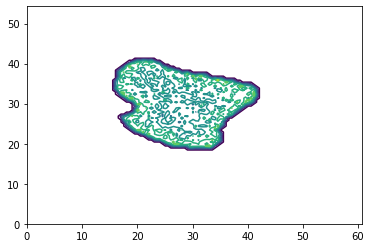

In [24]:
# Use Green's theorem to compute the area
# enclosed by the given contour.
def area(vs):
    a = 0
    x0,y0 = vs[0]
    for [x1,y1] in vs[1:]:
        dx = x1-x0
        dy = y1-y0
        a += 0.5*(y0*dx - x0*dy)
        x0 = x1
        y0 = y1
    return a

# Plot the data
levels = [0]
cl = plt.contour(lontokm_ROMSchild,lattokm_ROMSchild,heatmap_ROMSchild.fillna(0).T)

# Get one of the contours from the plot.
for i in range(len(levels)):
    contour = cl.collections[i]
    complete_area = []
    for j in np.arange(len(contour.get_paths())):
        vs = contour.get_paths()[j].vertices
        # Compute area enclosed by vertices.
        a = np.abs(area(vs))
        complete_area.append(a)
    print("r = " + str(levels[i]) + ": a =" + str(np.sum(complete_area)))

plt.show()

In [25]:
# Areas
INALT = 766.5085086480826
ROMS = 530.2676942353448
ROMSchild = 407.9638181720264